#  Data Visualization - 3D

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2}+1}$$

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

from sympy import symbols, diff

%matplotlib inline

In [13]:
# Function implementation

def f(x,y):
    r = 3**(-x**2-y**2)
    return 1/(r+1)

In [21]:
# x and y data generation

x_1 = np.linspace(start=-2,stop=2,num=200)
y_1 = np.linspace(start=-2,stop=2,num=200)

# Data type of x_1 & y_1 
#type(x_1)

#print('Shape of array', x_1.shape) #Vector
# As x_1 & y_1 are vectors, we need to transform them to a 2D array. 
# this to be able to graph

x_1, y_1 = np.meshgrid(x_1,y_1)
#print('Shape of array', x_1.shape) 


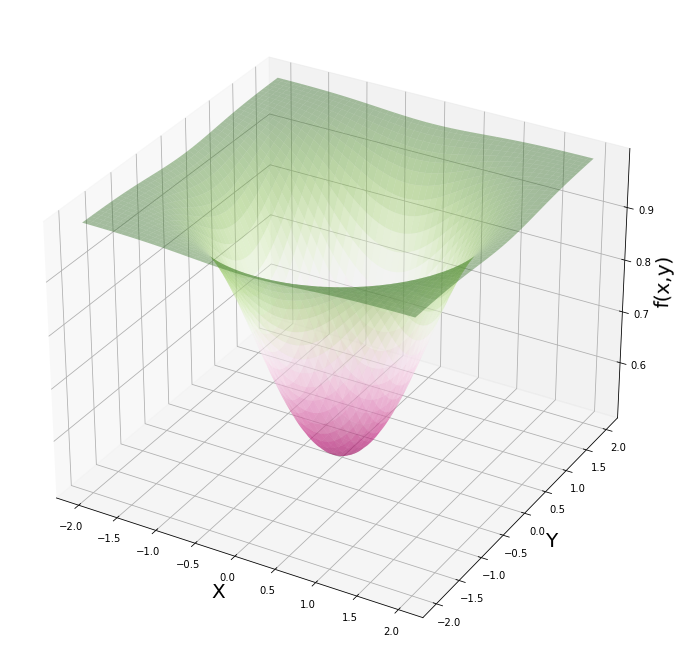

In [28]:
# 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection="3d")

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)', fontsize=20)

ax.plot_surface(x_1,y_1,f(x_1,y_1),cmap=cm.PiYG,alpha=0.4)

plt.show()

In [48]:
# Partial Derivatives 

a, b = symbols('x,y')

print('Cost function is: ',f(a,b))
print('')
print('Partial Derivative is : ',diff(f(a,b),a))
print('')
print('f(x,y) at x=1.8 y=1.0 is: ',f(a,b).evalf(subs={a:1.8,b:1.0})) #Using dictionaries with Python
print('')
print('Partial Derivative evaluated is : ',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Cost function is:  1/(3**(-x**2 - y**2) + 1)

Partial Derivative is :  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

f(x,y) at x=1.8 y=1.0 is:  0.990604794032582

Partial Derivative evaluated is :  0.0368089716197505


# Bacht Gradient Descent

In [58]:
# Variables

multiplier = 0.1
iterations = 500
params = np.array([1.8,1.0]) # Initial guess

for n in range(iterations):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier * gradients
    
# Collecting results
print('Values in gradient array: ', gradients)
print('Minumum occurs at x value of: ', params[0])
print('Minumum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0],params[1]))


Values in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minumum occurs at x value of:  3.45838599885832e-11
Minumum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000
